# Outliers

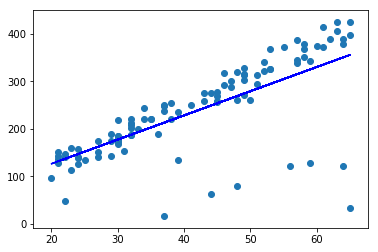

your regression object doesn't exist, or isn't name reg
can't make predictions to use in identifying outliers
outlierCleaner() is returning an empty list, no refitting to be done


In [2]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

### Slope of regression with outliers

In [3]:
print("slope: ", reg.coef_)
print("intercept: ", reg.intercept_)

slope:  [[ 5.07793064]]
intercept:  [ 25.21002155]


### Score of regression with outliers when it is applied to the test data

In [4]:
sc_train = reg.score(ages_test, net_worths_test)
print("R^2 training data: ", sc_train)

R^2 training data:  0.878262470366


### Slope after cleaning

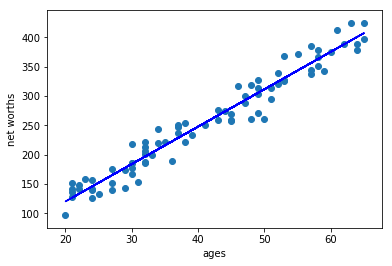

slope:  [[ 6.36859481]]
intercept:  [-6.91861069]


In [5]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    
    # Define the 10% of train data i.e. 90 * 0.1 = 9
    percentage = 0.1
    limit = int(len(ages_train) * percentage)
    
    """
        zip() is a built-in python function that combines the entries in data containers, in order, as tuples
        sorted is also a built-in python function that, as its names suggests, sorts lists.

        If the list just contained integers or floats, then you would use:
        
        sorted(simpleList, reverse=True)
        
        which just sorts the list in reverse order.

        If the list is a list of tuples, you can add an optional argument, a key,
        to tell it which value in the tuple to sort by. In this case the key is:
        
        key=lambda x: x[2][0]
        
        which says sort by the first item, [0], in the third item x[2], of the tuple.

        The reason for this is that the zipped list that you are sorting is a little more complicated
        than just a tuple, it is a tuple of arrays (each array has only one item, hence the [0]).

        x[2] is the third item in the tuple
        x[2][0] is the first item in the third item in the tuple (given that there is only one item in that array,
        it is both the first and only item)).

        So, sorted() will look at that value, in each of the tuples, and sort the list, in reverse order,
        based on those values.
    """

    cleaned_data = []
    predictions = reg.predict(ages_train)
    errors = (net_worths_train - predictions)**2

    cleaned_data = zip(ages_train, net_worths_train, errors)
    cleaned_data = sorted(cleaned_data, key=lambda x:x[2][0], reverse=True)

    return cleaned_data[limit:]
    
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")
    
print("slope: ", reg.coef_)
print("intercept: ", reg.intercept_)

### Score After Cleaning

In [6]:
sc_train = reg.score(ages_test, net_worths_test)
print("R^2 training data: ", sc_train)

R^2 training data:  0.983189455396


# Enron Outliers

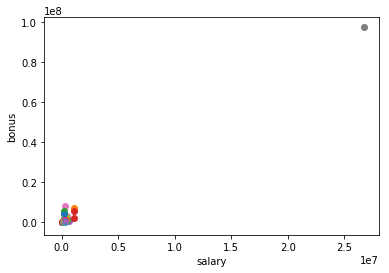

In [7]:
import pickle
import matplotlib.pyplot
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

### Identify The Biggest Enron Outlier
* TOTAL

### Remove Enron Outlier?
* Take it out, it's a spreadsheet quirk.

### Remove Enron Outlier. Any More Outliers?
* Probably four more

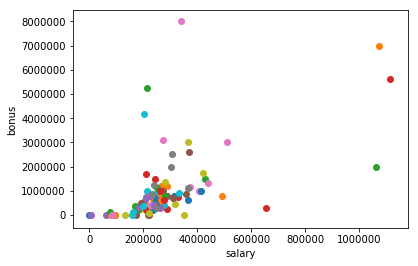

In [8]:
# By default, using no second argument, .pop() will throw a KeyError
# if the key isn't found in the dictionary (it won't return None).
# Sometimes, we don't want this behavior.
# Instead of needing a try-except block to catch the error or
# an if statement to make sure it isn't raised,
# we can pass a second argument to .pop() which will be returned if the key isn't found.
# So adding 0 returns 0 if the specified key isn't found.
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

### Identifying Two More Outliers
We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those points?

In [9]:
for employee in data_dict:
    if (data_dict[employee]["salary"] != 'NaN') and (data_dict[employee]["bonus"] != 'NaN'):
        if float(data_dict[employee]["salary"]) >1000000 and float(data_dict[employee]["bonus"])>5000000:
            print(employee)

LAY KENNETH L
SKILLING JEFFREY K


### Remove These Outliers?
Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? In other words, should they be removed before we, say, try to build a POI identifier?
* Leave them in, they are valid data points. They're two of Enron's biggest bosses, and definitely people of interest.